In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from PIL import Image

## 환경설정

In [2]:
face_detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
eye_detector = cv2.CascadeClassifier("haarcascade_eye.xml")

## 이미지 로드

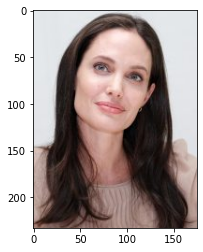

In [3]:
img = cv2.imread("angelina.jpg")
img_raw = img.copy()
plt.imshow(img[:, :, ::-1])


## 얼굴 탐지

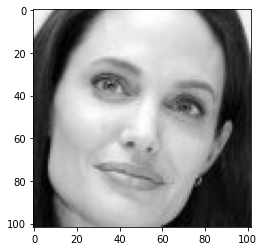

In [4]:
faces = face_detector.detectMultiScale(img, 1.3, 5)
face_x, face_y, face_w, face_h = faces[0]

img = img[int(face_y):int(face_y + face_h), int(face_x):int(face_x + face_w)]
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap='gray')

## 눈 탐지

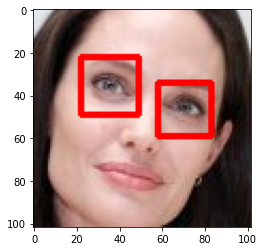

In [5]:
eyes = eye_detector.detectMultiScale(img_gray)

index = 0

for (eye_x, eye_y, eye_w, eye_h) in eyes:
    if index == 0:
        eye_1 = (eye_x, eye_y, eye_w, eye_h)
    elif index == 1:
        eye_2 = (eye_x, eye_y, eye_w ,eye_h)
        
    cv2.rectangle(img, (eye_x, eye_y), (eye_x + eye_w, eye_y + eye_h), (0, 0, 255), 2)
    index = index + 1
    
plt.imshow(img[:, :, ::-1])

In [6]:
if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1

## 좌표

* 인덱스
    * 0 : x
    * 1 : y
    * 2 : w
    * 3 : h

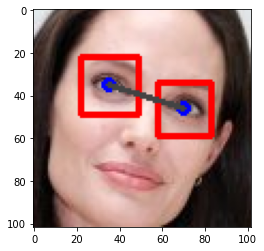

In [7]:
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)))
left_eye_x = left_eye_center[0]
left_eye_y = left_eye_center[1]

right_eye_center = (int(right_eye[0] + (right_eye[2] / 2)), int(right_eye[1] + (right_eye[3] / 2)))
right_eye_x = right_eye_center[0]
right_eye_y = right_eye_center[1]

cv2.circle(img, left_eye_center, 2, (255, 0, 0), 2)
cv2.circle(img, right_eye_center, 2, (255, 0, 0), 2)
cv2.line(img, right_eye_center, left_eye_center, (67, 67,67), 2)

plt.imshow(img[:, :, ::-1])

## 눈 회전방향 결정
* 왼쪽 눈이 오른쪽 눈보다 위 : 반시계 방향
* 왼쪽 눈이 오른쪽 눈보다 아래 : 시계 방향

<b>OpenCV의 원점이 좌측상단이라는 것에 주의하자!</b><br>
<b>각도의 증가 또한 반시계 방향으로 증가한다는 것에 주의하자.</b><br>

반시계방향 회전


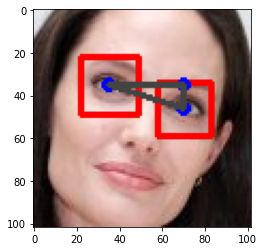

In [8]:
if left_eye_y < right_eye_y :
    point_3rd = (right_eye_x, left_eye_y)
    direction = 1 # 반시계방향
    print("반시계방향 회전")
else:
    point_3rd = (left_eye_x, right_eye_y)
    direction = -1 # 시계방향
    print("시계방향 회전")
    
cv2.circle(img, point_3rd, 2, (255, 0, 0), 2)

cv2.line(img, right_eye_center, left_eye_center, (67, 67, 67), 2)
cv2.line(img, left_eye_center, point_3rd, (67, 67, 67), 2)
cv2.line(img, right_eye_center, point_3rd, (67, 67, 67), 2)

plt.imshow(img[:, :, ::-1])    

## 유클리드 거리

In [9]:
import math

def euclidean_distance(a, b):
    x1 = a[0]
    y1 = a[1]
    x2 = b[0]
    y2 = b[1]
    
    return math.sqrt((x2 - x1) * (x2 - x1) + (y2 - y1)* (y2 - y1))

In [10]:
a = euclidean_distance(left_eye_center, point_3rd)
b = euclidean_distance(right_eye_center, left_eye_center)
c = euclidean_distance(right_eye_center, point_3rd)

print("a : ", a, ", b : ", b, ", c : ", c)

a :  35.0 , b :  36.68787265568828 , c :  11.0


## 회전 각도 계산
* 코사인 법칙 : 
$cos(A) = (b^2 + c^2 - a^2) \div (2bc)$

In [11]:
cos_a = (b * b + c * c - a * a) / (2 * b * c)
print("cos(a) = ", cos_a)

angle = np.arccos(cos_a)
print("angle : " , angle, " in radian")

angle = (angle * 180) / math.pi
print("angle : ", angle, " in degree")

if direction == 1:
    angle = 90 - angle

cos(a) =  0.2998265967403943
angle :  1.2662854435927844  in radian
angle :  72.55281157671782  in degree


## 이미지 회전

direction :  1
angle :  17.447188423282185


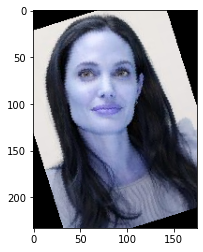

In [12]:
new_img = Image.fromarray(img_raw)
new_img = np.array(new_img.rotate(direction * angle))

print("direction : ", direction)
print("angle : ", angle)

plt.imshow(new_img)

## 확인

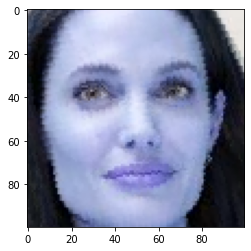

In [13]:
raw_new_img = new_img.copy()

faces = face_detector.detectMultiScale(new_img, 1.3, 5)
face_x, face_y, face_w, face_h = faces[0]

new_img = new_img[int(face_y):int(face_y + face_h), int(face_x):int(face_x + face_w)]

plt.imshow(new_img)

## DeepFace 사용

In [14]:
from deepface import DeepFace

Using TensorFlow backend.


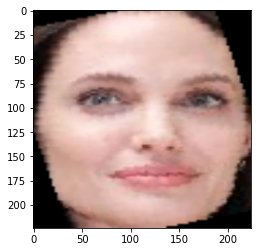

In [15]:
aligned_face = DeepFace.detectFace("angelina.jpg")
plt.imshow(aligned_face)